In [19]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/iris-flower-dataset/IRIS.csv'
iris_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(iris_data.head())



   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [20]:
# Check for missing values
print(iris_data.isnull().sum())

# Map the species names to numerical values
iris_data['species'] = iris_data['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})

# Check the distribution of the target variable
print(iris_data['species'].value_counts())

# Display summary statistics of the dataset
print(iris_data.describe())



sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
species
0    50
1    50
2    50
Name: count, dtype: int64
       sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


In [21]:
from sklearn.model_selection import train_test_split

# Define features and target
X = iris_data.drop(columns=['species'])
y = iris_data['species']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(120, 4) (30, 4) (120,) (30,)


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier with chosen hyperparameters
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model
clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Training Accuracy: 1.0
Testing Accuracy: 1.0
Classification Report on Test Data:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



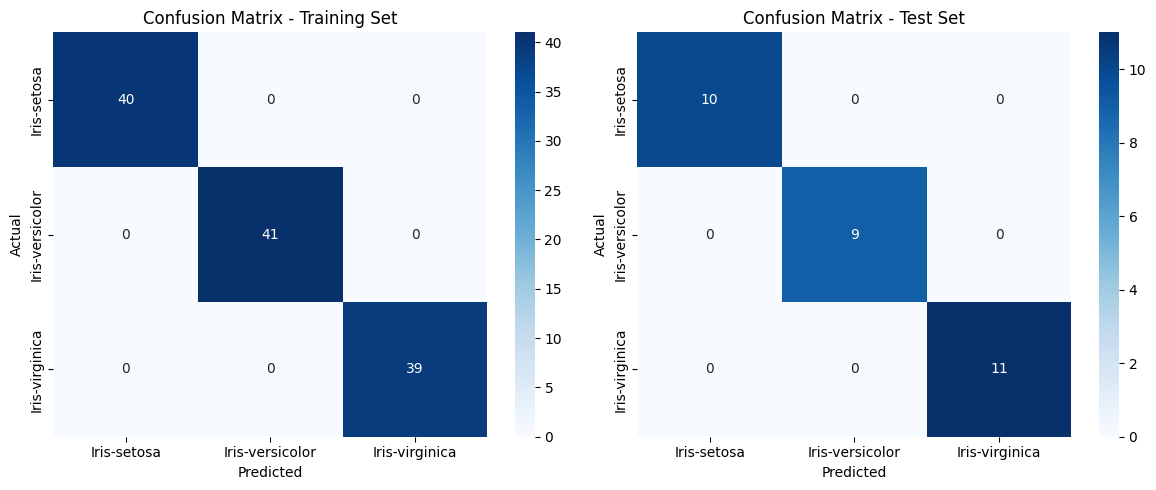

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# Evaluate the model's performance
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

print(f"Training Accuracy: {accuracy_train}")
print(f"Testing Accuracy: {accuracy_test}")
print("Classification Report on Test Data:\n", report_test)

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Plot confusion matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [24]:
# Example new data
new_data = pd.DataFrame([[5.1, 3.5, 1.4, 0.2], [6.7, 3.0, 5.2, 2.3]], columns=X.columns)

# Predict species for new data
new_predictions = clf.predict(new_data)
predicted_species = ['Iris-setosa' if pred == 0 else 'Iris-versicolor' if pred == 1 else 'Iris-virginica' for pred in new_predictions]

print("Predicted species for new data:", predicted_species)



Predicted species for new data: ['Iris-setosa', 'Iris-virginica']
